In [1]:
import cv2
import numpy as np
from skimage.filters import gabor
from scipy.stats import skew, kurtosis

# Read the image
img = cv2.imread('../Dataset/person1/person1_2.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the parameters for the Gabor filter
frequencies = [0.1, 0.5, 1, 2, 4, 8, 16]
thetas = [0, np.pi/4, np.pi/2, 3*np.pi/4]

# Initialize an empty feature vector
features = []

# Loop through all frequencies and orientations
for freq in frequencies:
    for theta in thetas:
        # Apply the Gabor filter
        filt_real, filt_imag = gabor(gray, frequency=freq, theta=theta)
        filtered_img = filt_real * 2 + filt_imag * 2

        # Extract texture features
        features.append(np.mean(filtered_img))
        features.append(np.var(filtered_img))
        features.append(skew(filtered_img.flatten()))
        features.append(kurtosis(filtered_img.flatten()))

# Print the feature vector
print(features)

[6.803371556048872, 1653.229325414583, 5.89727098892543, 32.78679312529405, 4.325664996151148, 1066.5546137276174, 7.502023774776056, 54.2886647498243, 4.542749270261458, 1118.9392848985988, 7.31379923859941, 51.49872365594424, 7.802824292335286, 1890.4150933893447, 5.464930489564807, 27.876347097227608, 0.22894915720745024, 45.92208403870928, 37.31851832009309, 1393.6636558698335, 0.0067240768381404865, 1.6187595654125317, 199.53838221748202, 39831.18138804001, 0.2907584457710534, 54.40535636925357, 34.26737772822592, 1175.479362127542, 0.04179011182571934, 10.318209290990033, 78.97539413399986, 6236.811381419281, 130.36727633087654, 5981.259811278556, -0.23680971269617163, -1.3253899959399609, 101.97997310626498, 992.7801809008668, 0.3829237780450823, -0.6291190556431285, 130.36727633087654, 5981.259811278556, -0.23680971269617163, -1.3253899959399609, 102.00241156160511, 994.1528949071321, 0.3828922790300405, -0.6302823791055299, 107.17475332940195, 4691.095848966795, 0.521859106587

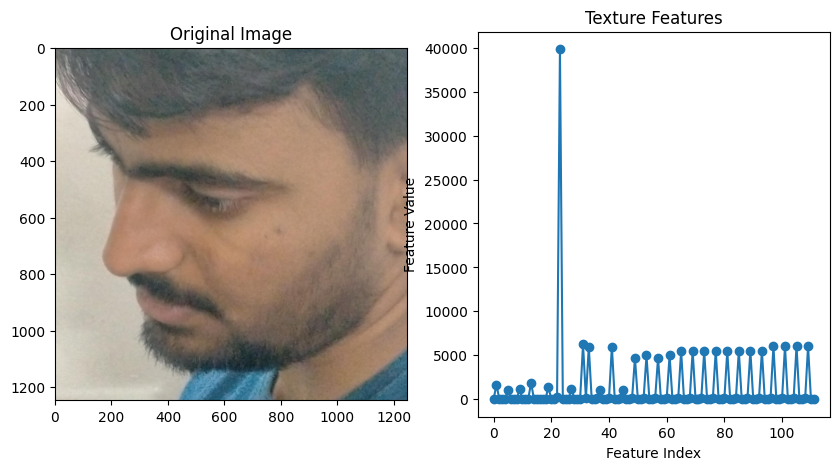

In [2]:
import matplotlib.pyplot as plt

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Show the image in the first subplot
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')

# Show the features plot in the second subplot
ax2.plot(features, 'o-')
ax2.set_xlabel('Feature Index')
ax2.set_ylabel('Feature Value')
ax2.set_title('Texture Features')

# Show the subplots
plt.show()
